## Supervised Learning - Building a Student Performace Prediction System  

## Question 1 - Classification vs. Regression

*The aim of this project is to predict how likely a student is to pass. Which type of supervised learning problem is this, classification or regression? Why?*

#### Answer:
This project is a classification supervised learning problem because the variable to predict, i.e. if a student graduates or fails to graduate, is categorical. On this case this a dichotomous categorical variable where the only two possible values are "pass" or "fail".

### Overview:

1.Read the problem statement.

2.Get the dataset.

3.Explore the dataset.

4.Pre-processing of dataset.

5.Transform the dataset for building machine learning model.

6.Split data into train, test set.

7.Build Model.

8.Apply the model.

9.Evaluate the model.

10.Provide insights.

## Problem Statement 

Using Logistic Regression **predict the performance of student**. The classification goal is to predict whether the student will pass or fail.

## Dataset 

This data approach student achievement in secondary education of two Portuguese schools. The data attributes include student grades, demographic, social and school related features) and it was collected by using school reports and questionnaires. Two datasets are provided regarding the performance in Mathematics.

**Source:** https://archive.ics.uci.edu/ml/datasets/Student+Performance


## Question 2
## Exploring the Data
*Read the dataset file using pandas. Take care about the delimiter.*

#### Answer:

In [417]:
## importing necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from pandas.plotting import scatter_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_score, cross_val_predict
import plotly.express as px
from numpy import array
import statsmodels.api as sm

In [418]:
## the data shared contains ; as the delimiter, to convert the data in csv format, the sep field is used python dataframe while reading csv
studentdf = pd.read_csv('students-data.csv',sep=';',quotechar='"',encoding='utf')



In [419]:
studentdf.head(10)
## from the below data we can observe that the data contains information about the student age,sex address, 
##family size of the student,Parents cohabitation status, mother's education and job, Father's educatin and job,school 
##he goes to and grades based on course subject and many other data
## the main inference is that Grades column has continuous distribution of numbers which should be converted to classes 
##pass or fail so that it can be used in classification algorithm

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10
5,GP,M,16,U,LE3,T,4,3,services,other,...,5,4,2,1,2,5,10,15,15,15
6,GP,M,16,U,LE3,T,2,2,other,other,...,4,4,4,1,1,3,0,12,12,11
7,GP,F,17,U,GT3,A,4,4,other,teacher,...,4,1,4,1,1,1,6,6,5,6
8,GP,M,15,U,LE3,A,3,2,services,other,...,4,2,2,1,1,1,0,16,18,19
9,GP,M,15,U,GT3,T,3,4,other,other,...,5,5,1,1,1,5,0,14,15,15


In [420]:
studentdf.dtypes
## we could observe the different data types of each column in student data , columns like school, sex,address, famsize ..etc belongs to object
## columns like age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3 belongs to integers          

school        object
sex           object
age            int64
address       object
famsize       object
Pstatus       object
Medu           int64
Fedu           int64
Mjob          object
Fjob          object
reason        object
guardian      object
traveltime     int64
studytime      int64
failures       int64
schoolsup     object
famsup        object
paid          object
activities    object
nursery       object
higher        object
internet      object
romantic      object
famrel         int64
freetime       int64
goout          int64
Dalc           int64
Walc           int64
health         int64
absences       int64
G1             int64
G2             int64
G3             int64
dtype: object

In [421]:
studentdf.shape
## from this we can infer that there are 395 rows and 33 columns in the student data


(395, 33)

## Question 3
## Drop missing values
*Set the index name of the dataframe to **"number"**. Check sample of data to drop if any missing values are there.*

#### Answer:

In [422]:
##setting index of dataframe as number
studentdf.index.name = 'number'
## the index has been names as number in the student dataframe

In [423]:
##verifying the index name change in the student dataframe
studentdf.head(10)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
number,,,,,,,,,,,,,,,,,,,,,
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10
5,GP,M,16,U,LE3,T,4,3,services,other,...,5,4,2,1,2,5,10,15,15,15
6,GP,M,16,U,LE3,T,2,2,other,other,...,4,4,4,1,1,3,0,12,12,11
7,GP,F,17,U,GT3,A,4,4,other,teacher,...,4,1,4,1,1,1,6,6,5,6
8,GP,M,15,U,LE3,A,3,2,services,other,...,4,2,2,1,1,1,0,16,18,19


In [424]:
##verifying missing values in studentdataset
studentdf.isnull().sum()
## we could find that there are no null values in the datasets no need to drop any rows


school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64

In [425]:
##verifying the same using data sample
studentdf.isnull()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
number,,,,,,,,,,,,,,,,,,,,,
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
8,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [426]:
studentdf.head(10)
##printing sample to check the null values

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
number,,,,,,,,,,,,,,,,,,,,,
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10
5,GP,M,16,U,LE3,T,4,3,services,other,...,5,4,2,1,2,5,10,15,15,15
6,GP,M,16,U,LE3,T,2,2,other,other,...,4,4,4,1,1,3,0,12,12,11
7,GP,F,17,U,GT3,A,4,4,other,teacher,...,4,1,4,1,1,1,6,6,5,6
8,GP,M,15,U,LE3,A,3,2,services,other,...,4,2,2,1,1,1,0,16,18,19


## Transform Data

*Print all the attribute names which are not numerical.*

**Hint:** check **select_dtypes()** and its **include** and **exclude** parameters.**

#### Answer:

In [427]:
##priting the attributes which are not numerical ie, prints only attributes which are object and excludes attributes which are integers
print('The clolumns which are not numberical in student datasets are:')
## storing the categorical value in categoricaldf
categoricaldf = studentdf.select_dtypes(include=['object'],exclude=['int64'])
##printing the attribute names which are not numerical
print('Attribute names which are not numerical are')
print(categoricaldf.columns.values)

##checking the size of the categorical variables
print('Size of the categorical variables are',categoricaldf.shape)

The clolumns which are not numberical in student datasets are:
Attribute names which are not numerical are
['school' 'sex' 'address' 'famsize' 'Pstatus' 'Mjob' 'Fjob' 'reason'
 'guardian' 'schoolsup' 'famsup' 'paid' 'activities' 'nursery' 'higher'
 'internet' 'romantic']
Size of the categorical variables are (395, 17)


## Drop variables with less variance

*Find the variance of each numerical independent variable and drop whose variance is less than 1.*

In [428]:
##finding out the numerical dependent variables using select_dtype including integer and excluding object
numericaldf = studentdf.select_dtypes(include=['int64'],exclude=['object'])
##checking the size of the categorical variables
print('Size of the numerical dataset is',numericaldf.shape)



Size of the numerical dataset is (395, 16)


In [429]:
## using numerical dataset to check the variables  with varince greater than 1 and drop the variables with variance less than 1
numericaldf = numericaldf.loc[:,numericaldf.var() > 1 ]
##  checking the dataframe size aftering dropping the variables with variance less than one
print('Size of the numerical dataset after dropping variables with variance less than one is',numericaldf.shape)



Size of the numerical dataset after dropping variables with variance less than one is (395, 10)


In [430]:
## forming new dataset with filtered numerical dataset and categrorical dataset
studentnewdf = pd.concat([numericaldf, categoricaldf], axis=1)

print('New students dataset after dropping variables with variance less than one is',studentnewdf.shape)
## we could observe that 6 columns are dropped

New students dataset after dropping variables with variance less than one is (395, 27)


In [431]:
## priting sample from new dataset
print('new student dataset after dropping variables with variance less than one is')
print(studentnewdf.head(20))
##will be using studentdfnew dataset from now

new student dataset after dropping variables with variance less than one is
        age  Medu  Fedu  goout  Walc  health  absences  G1  G2  G3  ...  \
number                                                              ...   
0        18     4     4      4     1       3         6   5   6   6  ...   
1        17     1     1      3     1       3         4   5   5   6  ...   
2        15     1     1      2     3       3        10   7   8  10  ...   
3        15     4     2      2     1       5         2  15  14  15  ...   
4        16     3     3      2     2       5         4   6  10  10  ...   
5        16     4     3      2     2       5        10  15  15  15  ...   
6        16     2     2      4     1       3         0  12  12  11  ...   
7        17     4     4      4     1       1         6   6   5   6  ...   
8        15     3     2      2     1       1         0  16  18  19  ...   
9        15     3     4      1     1       5         0  14  15  15  ...   
10       15     4     4 

## Question 4 - Encode all categorical variables to numerical

Take the list of categorical attributes(from the above result) and convert them into neumerical variables. After that, print the head of dataframe and check the values.

**Hint:** check **sklearn LabelEncoder()**

#### Answer:

In [432]:
##using label encoder to convert all categorical data into numerical values
## the lableencoder is applied on the temporary categorical dataframe which only includes categorical attributes
le = preprocessing.LabelEncoder()
categoricaldf  = categoricaldf.apply(preprocessing.LabelEncoder().fit_transform)
##printing the head of the dataframe after converting categorical variables into numeric using label encoder
categoricaldf.head(5)


,school,sex,address,famsize,Pstatus,Mjob,Fjob,reason,guardian,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic
number,,,,,,,,,,,,,,,,,
0,0,0,1,0,0,0,4,0,1,1,0,0,0,1,1,0,0
1,0,0,1,0,1,0,2,0,0,0,1,0,0,0,1,1,0
2,0,0,1,1,1,0,2,2,1,1,0,1,0,1,1,1,0
3,0,0,1,0,1,1,3,1,1,0,1,1,1,1,1,1,1
4,0,0,1,0,1,2,2,1,0,0,1,1,0,1,1,0,0


In [433]:
## assigning the encoded categoical values to the original students dataframe

studentnewdf.update(categoricaldf)
##verifying the values
print('new students dataset with label encoded categorical variables is :')
print(studentnewdf.head(5))
##checking the size of the dataframe
print('shape of the new dataset is',studentnewdf.shape)



new students dataset with label encoded categorical variables is :
        age  Medu  Fedu  goout  Walc  health  absences  G1  G2  G3  ...  \
number                                                              ...   
0        18     4     4      4     1       3         6   5   6   6  ...   
1        17     1     1      3     1       3         4   5   5   6  ...   
2        15     1     1      2     3       3        10   7   8  10  ...   
3        15     4     2      2     1       5         2  15  14  15  ...   
4        16     3     3      2     2       5         4   6  10  10  ...   

       reason guardian schoolsup famsup paid activities nursery higher  \
number                                                                   
0           0        1         1      0    0          0       1      1   
1           0        0         0      1    0          0       0      1   
2           2        1         1      0    1          0       1      1   
3           1        1         0     

## Question 5 - Convert the continuous values of grades into classes

*Consider the values in G1, G2 and G3 with >= 10 as pass(1) and < 10 as fail(0) and encode them into binary values. Print head of dataframe to check the values.*

#### Answer:

In [434]:
## converting continuous values of grades into classes to be used for classfication problem using Logistic regression

##using the below condition to determine pass or fail of a studen based on the marks score , if marks are >= 10, it is pass else it is fail
studentnewdf['G1'] = studentnewdf['G1'].apply(lambda x: 'pass' if x >=10 else 'fail')
studentnewdf['G2'] = studentnewdf['G2'].apply(lambda x: 'pass' if x >=10 else 'fail')
studentnewdf['G3'] = studentnewdf['G3'].apply(lambda x: 'pass' if x >=10 else 'fail')
#studentnewdf = studentnewdf.loc[studentnewdf.G1 >= 10, 'G1'] = 'pass' 
#studentnewdf = studentnewdf.loc[studentnewdf.G1 < 10 , 'G1'] = 'fail' 

#studentnewdf = studentnewdf.loc[studentnewdf.G2 >= 10, 'G2'] = 'pass' 
#studentnewdf = studentnewdf.loc[studentnewdf.G2 < 10 , 'G2'] = 'fail' 

#studentnewdf = studentnewdf.loc[studentnewdf.G3 >= 10, 'G3'] = 'pass' 
#studentnewdf = studentnewdf.loc[studentnewdf.G3 < 10 , 'G3'] = 'fail' 
##printing the head of the dataframe to confirm the modifications
#studentnewdf

In [435]:
##encoding into binary values zeros and ones
##studentnewdf = studentnewdf.replace(to_replace='pass',value=1)
studentnewdf['G1'] = studentnewdf['G1'] .replace({'pass':1,'fail':0})
studentnewdf['G2'] = studentnewdf['G2'] .replace({'pass':1,'fail':0})
studentnewdf['G3'] = studentnewdf['G3'] .replace({'pass':1,'fail':0})

In [436]:
studentnewdf['school'] = studentnewdf['school'].astype('int64')
studentnewdf['sex'] = studentnewdf['sex'].astype('int64')
studentnewdf['address'] = studentnewdf['address'].astype('int64')
studentnewdf['famsize'] = studentnewdf['famsize'].astype('int64')
studentnewdf['Pstatus'] = studentnewdf['Pstatus'].astype('int64')
studentnewdf['Mjob'] = studentnewdf['Mjob'].astype('int64')
studentnewdf['Fjob'] = studentnewdf['Fjob'].astype('int64')
studentnewdf['reason'] = studentnewdf['reason'].astype('int64')
studentnewdf['guardian'] = studentnewdf['guardian'].astype('int64')
studentnewdf['schoolsup'] = studentnewdf['schoolsup'].astype('int64')
studentnewdf['famsup'] = studentnewdf['famsup'].astype('int64')
studentnewdf['paid'] = studentnewdf['paid'].astype('int64')
studentnewdf['activities'] = studentnewdf['activities'].astype('int64')
studentnewdf['nursery'] = studentnewdf['nursery'].astype('int64')
studentnewdf['higher'] = studentnewdf['higher'].astype('int64')
studentnewdf['internet'] = studentnewdf['internet'].astype('int64')
studentnewdf['romantic'] = studentnewdf['romantic'].astype('int64')
studentnewdf.dtypes

age           int64
Medu          int64
Fedu          int64
goout         int64
Walc          int64
health        int64
absences      int64
G1            int64
G2            int64
G3            int64
school        int64
sex           int64
address       int64
famsize       int64
Pstatus       int64
Mjob          int64
Fjob          int64
reason        int64
guardian      int64
schoolsup     int64
famsup        int64
paid          int64
activities    int64
nursery       int64
higher        int64
internet      int64
romantic      int64
dtype: object

In [437]:
#printing the sample to check the converted data
studentnewdf.head(20)

,age,Medu,Fedu,goout,Walc,health,absences,G1,G2,G3,...,reason,guardian,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic
number,,,,,,,,,,,,,,,,,,,,,
0,18,4,4,4,1,3,6,0,0,0,...,0,1,1,0,0,0,1,1,0,0
1,17,1,1,3,1,3,4,0,0,0,...,0,0,0,1,0,0,0,1,1,0
2,15,1,1,2,3,3,10,0,0,1,...,2,1,1,0,1,0,1,1,1,0
3,15,4,2,2,1,5,2,1,1,1,...,1,1,0,1,1,1,1,1,1,1
4,16,3,3,2,2,5,4,0,1,1,...,1,0,0,1,1,0,1,1,0,0
5,16,4,3,2,2,5,10,1,1,1,...,3,1,0,1,1,1,1,1,1,0
6,16,2,2,4,1,3,0,1,1,1,...,1,1,0,0,0,0,1,1,1,0
7,17,4,4,4,1,1,6,0,0,0,...,1,1,1,1,0,0,1,1,0,0
8,15,3,2,2,1,1,0,1,1,1,...,1,1,0,1,1,0,1,1,1,0


## Question 6 
*Consider G3 is the target attribute and remaining all attributes as features to predict G3. Now, separate features and target into separate dataframes and name them X and y respectively.*

In [438]:
## splitting the features and target variable
##G3 is dependent variable so dropping it from the feature
X = studentnewdf.drop('G3', axis=1)
##forming target variable by passing G3 
y = studentnewdf['G3']

## Visualization

## Question 7

*Plot G2 and G3 and give your understanding on relation between both variables.*

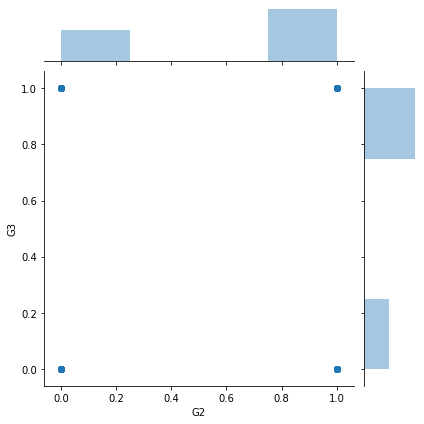

In [439]:
##plotting G2 and G3

##sns.scatterplot(x = studentnewdf['G2'], y = studentnewdf['G3'],data =studentnewdf)
sns.jointplot(studentnewdf['G2'],studentnewdf['G3'])

## we could infer that the number of students failed in G2 are likely to fail in G3. The number of students passed in G2 passed in G3 as well
##The fail ratio has reduced in G3


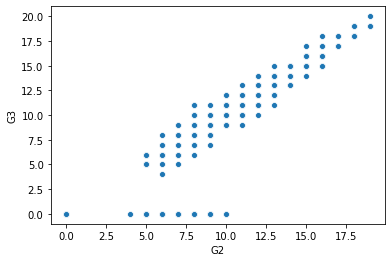

In [440]:
##finding the relation between g2 and g3 from originaldataset before classifying class based on marks obtained to find the relation between two variables
sns.scatterplot(x = studentdf['G2'],y = studentdf['G3'])
##we could find that G2 and G3 are highly correlated, student scored same number of scores in G3 similar to the scres obtained in G2.
##so G2 plays good role in predicting student grades in G3
##There are few outliers in the range between 2.5 t0 10, in few occasions student who scored less marks in G2 scoredmores in G3


The G3 depends a great deal on the G2. Thus, the G2 can be a good predictor of the outcome variable.


## Question 8

*Plot the number of students in each school and number of students with different ages in separate plots.*

Text(0, 0.5, 'Number of Student')

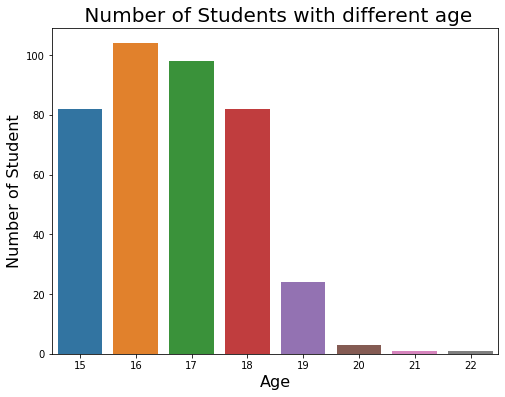

In [441]:
# Final Grade Countplot
plt.figure(figsize=(8,6))
sns.countplot(studentnewdf['age'])
plt.title(' Number of Students with different age',fontsize=20)
plt.xlabel('Age', fontsize=16)
plt.ylabel('Number of Student', fontsize=16)
## we could infer that more number of students with ages around 15 to 18 goes to school compared to the students with age 19 to 22
## we could also observe that age column is right skewed

Text(0, 0.5, 'Number of Student')

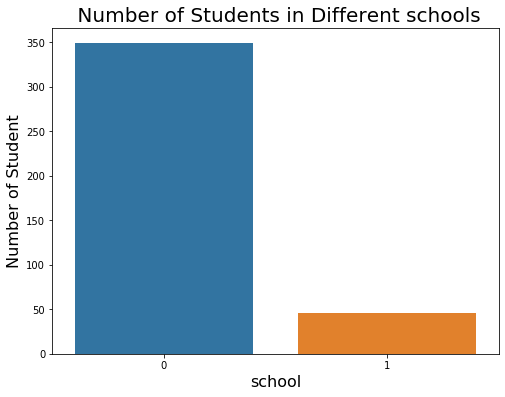

In [442]:
# Final Grade Countplot
plt.figure(figsize=(8,6))
sns.countplot(studentnewdf['school'])
plt.title(' Number of Students in Different schools',fontsize=20)
plt.xlabel('school', fontsize=16)
plt.ylabel('Number of Student', fontsize=16)
##school zero is ‘GP’ - Gabriel Pereira and school 1 is ‘MS’ - Mousinho da Silveira , as they are converted from categorical 
##to integers using label encodin in the previous steps
## we could infer that higher number of students around 350 goes to GP and around 49 students go to MS

## Question 9 - Training and testing data split

*So far, you have converted all categorical features into numeric values. Now, split the data into training and test sets with training size of 300 records. Print the number of train and test records.*

**Hint:** check **train_test_split()** from **sklearn**

#### Answer:

In [443]:
##splitting training set with 300 records and test set with 95 records
X_train ,X_test ,y_train , y_test = train_test_split(X ,y , test_size = 0.24 , random_state = 1 )
##verifyig the training and test set records
print('train record size is',X_train.shape)
print('test record size is',X_test.shape)

train record size is (300, 26)
test record size is (95, 26)


## Question 10 - Model Implementation and Testing the Accuracy

*Build a **LogisticRegression** classifier using **fit()** and **predict()** functions in sklearn. Print Accuracy and F1 score of Training and Test sets.*

#### Answer:

In [444]:
##forming the logisitcRegression model 
model = LogisticRegression()
model.fit(X_train,y_train)
y_trainpredict = model.predict(X_train)
y_testpredict = model.predict(X_test)

C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning:

Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.



In [445]:
#model_trainscore = accuracy_score(X_train, y_train)
#model_testscore = accuracy_score(X_test, y_test)
print('The accuray of the training data is',metrics.accuracy_score(y_train, y_trainpredict))
print('The accuray of the testing data is',metrics.accuracy_score(y_test, y_testpredict))
print('The F1 score of the training data set  is',metrics.f1_score(y_train, y_trainpredict))
print('The F1 score of the test data set is',metrics.f1_score(y_test, y_testpredict)) 
## from the accuracy score and F1 score we can find that model is predicting accuracy similar to training dataset

The accuray of the training data is 0.9333333333333333
The accuray of the testing data is 0.9052631578947369
The F1 score of the training data set  is 0.9484536082474226
The F1 score of the test data set is 0.931297709923664


In [446]:
##printing the classification report and confusion matrix of the dataset
print('The confusion matrix of the test data set  is:')
print(metrics.confusion_matrix(y_test, y_testpredict))
## the model has performed well inpredicting the accurcy score.
##we could infer that the model has estimated 25 true positives and 61 True negaives. Model has misinterpretted 6 fails as pass
##and 3 pass as failures of the test data set
print('The confusion matrix of the train data set  is:')
print(metrics.confusion_matrix(y_train, y_trainpredict))
## the model has performed well inpredicting the accurcy score.
##we could infer that the model has estimated 96 true positives and 184 True negaives. Model has misinterpretted 14 fails as pass
##and 6 pass as fails  of the training data set

The confusion matrix of the test data set  is:
[[25  3]
 [ 6 61]]
The confusion matrix of the train data set  is:
[[ 96   6]
 [ 14 184]]


In [447]:
metrics.classification_report(y_test, y_testpredict)

'              precision    recall  f1-score   support\n\n           0       0.81      0.89      0.85        28\n           1       0.95      0.91      0.93        67\n\n    accuracy                           0.91        95\n   macro avg       0.88      0.90      0.89        95\nweighted avg       0.91      0.91      0.91        95\n'

In [448]:
X2 = sm.add_constant(X)
result = sm.OLS(y, X2)
result1 = result.fit()
print(result1.summary())
## we could see p-value of all the dependent variables in the table given below
##considering G2 column which has higher correlation with target variable , we could find that p-value is higher.
##nochange in the class of students in target variable G3 as compared to results obtained in G2

                            OLS Regression Results                            
Dep. Variable:                     G3   R-squared:                       0.714
Model:                            OLS   Adj. R-squared:                  0.694
Method:                 Least Squares   F-statistic:                     35.29
Date:                Sun, 15 Dec 2019   Prob (F-statistic):           9.38e-84
Time:                        23:04:19   Log-Likelihood:                -15.103
No. Observations:                 395   AIC:                             84.21
Df Residuals:                     368   BIC:                             191.6
Df Model:                          26                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.7294      0.250      2.923      0.0

C:\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning:

Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.



# Naive bayes with Iris data

### Import Iris.csv

In [280]:
##importing the iris dataset
Iris = pd.read_csv('iris.csv')

In [281]:
##printing the sample
Iris.head(10)
##we could observe that Iris data contains SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm which are features and species as label

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
5,6,5.4,3.9,1.7,0.4,Iris-setosa
6,7,4.6,3.4,1.4,0.3,Iris-setosa
7,8,5.0,3.4,1.5,0.2,Iris-setosa
8,9,4.4,2.9,1.4,0.2,Iris-setosa
9,10,4.9,3.1,1.5,0.1,Iris-setosa


In [282]:
##printing the data after replacing null values with the median. 
print(Iris.head(10))
##printing the shape of iris data
Iris.shape
##Iris data contains 152 rows and 6 columns

   Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0   1            5.1           3.5            1.4           0.2  Iris-setosa
1   2            4.9           3.0            1.4           0.2  Iris-setosa
2   3            4.7           3.2            1.3           0.2  Iris-setosa
3   4            4.6           3.1            1.5           0.2  Iris-setosa
4   5            5.0           3.6            1.4           0.2  Iris-setosa
5   6            5.4           3.9            1.7           0.4  Iris-setosa
6   7            4.6           3.4            1.4           0.3  Iris-setosa
7   8            5.0           3.4            1.5           0.2  Iris-setosa
8   9            4.4           2.9            1.4           0.2  Iris-setosa
9  10            4.9           3.1            1.5           0.1  Iris-setosa


(152, 6)

In [283]:
##printing the types of column of Iris data
Iris.dtypes
## Iris data has different features Id which is of int data type , SepalLengthCm of float ,SepalWidthCm of float , petallengthcm of float, petalwidthcm of float and species f bject datatype

Id                 int64
SepalLengthCm    float64
SepalWidthCm     float64
PetalLengthCm    float64
PetalWidthCm     float64
Species           object
dtype: object

In [284]:
##from the below we could infer that classes has three fields Iris-Setosa, Iris-versicolor,Iris-virginica.
##The model has distribution ratio of almost 1:1:1
Iris.groupby(['Species']).count()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
Species,,,,,
Iris-setosa,50,50,50,50,50
Iris-versicolor,50,50,50,50,50
Iris-virginica,52,51,50,50,51


In [285]:
Iris.isnull().any()
## checking if Iris data contain null values in SepalLengthCm, SepalWidthCm, PetalLengthCm, PetalWidthCm field

Id               False
SepalLengthCm     True
SepalWidthCm      True
PetalLengthCm     True
PetalWidthCm      True
Species          False
dtype: bool

In [286]:
## Iris data contain null values in SepalLengthCm, SepalWidthCm, PetalLengthCm, PetalWidthCm and replace null values with the median
Iris.fillna(Iris.median(),inplace= True)

### Slice data set for Independent variables and dependent variables
#### Please note 'Species' is my dependent variables, name it y and independent set data as X

In [287]:
## Id feature has no meaningful value in finding the accuracy score of the model, It has no relation with target feature hence dropping it
Iris.drop(['Id'], inplace = True, axis = 1)
##using labelencoder to convert categrical values of species class into numericals
le= preprocessing.LabelEncoder()
Iris['Species'] = le.fit_transform(Iris['Species'])
Iris.head(10)
##printing the sample after labelencoding

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
5,5.4,3.9,1.7,0.4,0
6,4.6,3.4,1.4,0.3,0
7,5.0,3.4,1.5,0.2,0
8,4.4,2.9,1.4,0.2,0
9,4.9,3.1,1.5,0.1,0


In [288]:
##splitting the data into dependent and independent variable for classfication problem
##dropping ID column as it has no meaning value in predicting the model accuracy
X = Iris.drop(['Species'], axis = 1)
y = Iris['Species']

### Find the distribution of target variable (Class)

In [289]:
## finding the distribution of target variable
Iris['Species'].value_counts()
## we could find that distribution of different classes.Iris-virginica  has total of 52 classes and Iris-setosa has 50 classes
## and Itis-versicolor has 50 classes

2    52
1    50
0    50
Name: Species, dtype: int64

### Plot the distribution of target variable using histogram

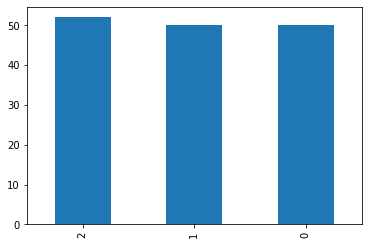

In [290]:
pd.value_counts(Iris["Species"]).plot(kind="bar")
## 0 represents Iris-versicolor, 1 represents Iris-setosa and 2 represents Iris-virginica
## we could see the disribution of classes in form of bar graph. All the classes are equally distributed in Iris data set

### Plot Scatter Matrix to understand the distribution of variables and give insights from it( 1 Marks)

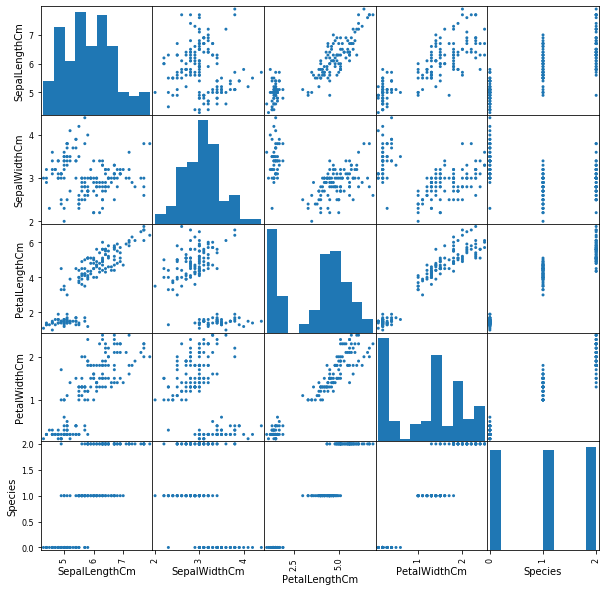

In [291]:

pd.plotting.scatter_matrix(Iris, alpha=1.0, figsize=(10,10))
plt.show()
## from the below scatter matrix we can find the relation between different species
##we can infer that petalwidth and petallength are highly correlated with target variable.
##using petalwidth and petallength variables we are able to predict the class of the flower.
##apart from that we could high correlation between Petallength and petalwidth
##if petallength is between 0 to 1.5 , the flower belngs to Iris-setosa, if the petalwidth is between 1.5 to 5 flower belongs to Iris-versicolor and above 5 till 6.7 flower belongs to iris-virginica. 

In [292]:
##alternate scatter matrix using plotly
##scatter matrix using plotly
fig = px.scatter_matrix(Iris,
    dimensions=["SepalLengthCm","SepalWidthCm", "PetalLengthCm","PetalWidthCm"],
    color="Species")
fig.show()
##we could find the relation between different features with target variable.
##Three species are represented using three different colors
## there is high correlation between SepalLength and PetalWidth
## there is high correlation between petallength and PetalWidth
##iris-versicolor is represented in blue , iris-setosa is represented in pink and iris-virginica in yellow
##petallength and petalwidth plays significant role in predicting the species of the flower to which it belongs to

### Summary Statistics and explain insights for at least 2 variables

In [293]:
##summary statics of the entire dataset is 
print('Summary statistics is')
Iris.describe().transpose

Summary statistics is


<bound method DataFrame.transpose of        SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm     Species
count     152.000000    152.000000     152.000000    152.000000  152.000000
mean        5.843421      3.053289       3.766447      1.203289    1.013158
std         0.822584      0.430757       1.754000      0.759698    0.821780
min         4.300000      2.000000       1.000000      0.100000    0.000000
25%         5.100000      2.800000       1.600000      0.300000    0.000000
50%         5.800000      3.000000       4.350000      1.300000    1.000000
75%         6.400000      3.300000       5.100000      1.800000    2.000000
max         7.900000      4.400000       6.900000      2.500000    2.000000>

In [294]:
##summary statistics of pertaillength
Iris['PetalLengthCm'].describe()
## mean  of PetalLengthCm is 3.766447
## median of PetalLengthCm is 4.350000
## Interquartile 25 % of PetalLengthCm is 1.600000
## Interquartile 75 % of PetalLengthCm is 5.100000
##maximum value of PetalLengthCm is 6.90000
##minimum value of PetalLengthcm is 1
##std deviation of PetalLength is 1.754000
## from this we can infer that mean is lesser than median lesser 



count    152.000000
mean       3.766447
std        1.754000
min        1.000000
25%        1.600000
50%        4.350000
75%        5.100000
max        6.900000
Name: PetalLengthCm, dtype: float64

C:\Anaconda3\lib\site-packages\seaborn\axisgrid.py:230: UserWarning:

The `size` paramter has been renamed to `height`; please update your code.



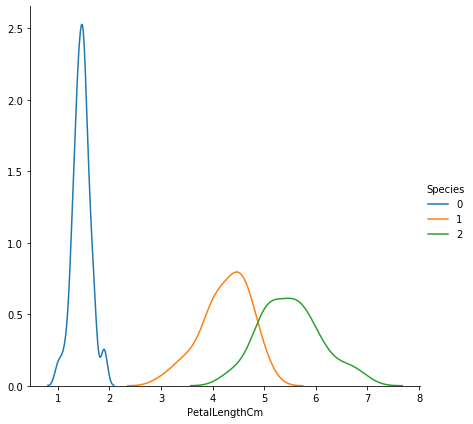

In [295]:
##plotting the distribution using histogram
##Distribution of PetalLength


#Create a density curve of the Petallength distribution
sns.FacetGrid(Iris, hue="Species", size=6).map(sns.kdeplot, "PetalLengthCm").add_legend()

##Inference:We could find three normally distributed curve for peallength which is different for multiple classes Iris-setosa,Iris-virginica and iris-virsicolor
##we could see overlapping feature between iris-setosa and iris-virginica classes and Iris-virsicular is independent of other classes
## Zero represents : iris-versicolor
##1 represents : iris-setosa
##2 represents : iris-virginica

The description of petalwidth is
count    152.000000
mean       1.203289
std        0.759698
min        0.100000
25%        0.300000
50%        1.300000
75%        1.800000
max        2.500000
Name: PetalWidthCm, dtype: float64


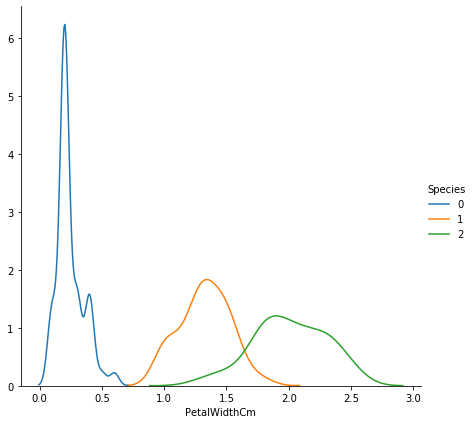

In [296]:
print('The description of petalwidth is')
print(Iris['PetalWidthCm'].describe())
## mean  of PetalWidth is 1.203289
## median of PetalWidth is 1.300000
## Interquartile 25 % of PetalWidth is 0.300000
## Interquartile 75 % of PetalWidth is 1.800000
##maximum value of PetalWidth is 2.500000
##minimum value of PetalWidth is 0.100000
##std deviation of PetalWidth is 1.203289


#Create a density curve of the petalwidth distribution
sns.FacetGrid(Iris, hue="Species", size=6).map(sns.kdeplot, "PetalWidthCm").add_legend()
##Inference:We could find three normally distributed curve for pealwidth which is different for multiple classes Iris-setosa,Iris-virginica and iris-virsicolor
##we could see overlapping feature between iris-setosa and iris-virginica classes
## Zero represents : iris-versicolor
##1 represents : iris-setosa
##2 represents : iris-virginica

### Correlation among all variables and give your insights

In [297]:
##finding the correlation of all variables
print('correleation of variables:')
Iris.corr()

##from this we could infer that PetalLengthCm and PetalWidthCm are highly correlated with the target variable 
##petallength and petalwidth play good role in predicting the flower classes


correleation of variables:


,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
SepalLengthCm,1.000000,-0.109369,0.871120,0.815986,0.775061
SepalWidthCm,-0.109369,1.000000,-0.420713,-0.356510,-0.417318
PetalLengthCm,0.871120,-0.420713,1.000000,0.962043,0.944477
PetalWidthCm,0.815986,-0.356510,0.962043,1.000000,0.952513
Species,0.775061,-0.417318,0.944477,0.952513,1.000000


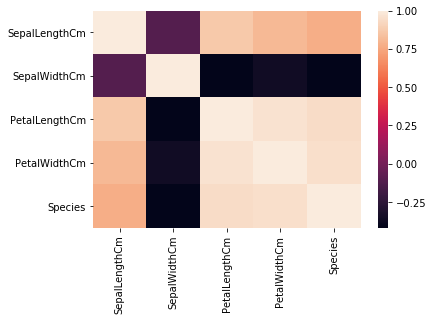

In [298]:
sns.heatmap(Iris.corr())
##the same is represented through graphics as well
##we can find high positive correlation between PetalWidth and PetalLength (0.96)
##we can find high positive correlation between PetalLength and SepalLength (0.87)
##we can find high positive correlation between PetalWidth and SepalLength (0.81)
##we can find high positive correlation between PetalWidth and species (0.81)
##we can find high positive correlation between Petalength and species (0.94)

### Split data in Training and Validation in 80:20

In [299]:
##splitting training and test data into 80 : 20 ratio
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1) 

### Do Feature Scaling

In [300]:
##feature scaling using standardscaler, however for algorithm like NaiveBayes, the scaling is done by algorithm itself.
sc = StandardScaler()
scaled_X_train = sc.fit_transform(X_train)
scaled_X_test = sc.fit_transform(X_test)

### Train and Fit NaiveBayes Model

In [301]:
# Invoking the NB Gaussian function to create the model
# fitting the model in the training data set
model = GaussianNB()

In [302]:
model.fit(scaled_X_train,y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [303]:
y_trainpredict = model.predict(scaled_X_train)
y_testpredict = model.predict(scaled_X_test)


### Print Accuracy and Confusion Matrix and Conclude your findings

In [304]:
##training accuracy of the model is 
print('Training accuracy of the model is',metrics.accuracy_score(y_train, y_trainpredict))
print('testing accuracy of the model is',metrics.accuracy_score(y_test, y_testpredict))


Training accuracy of the model is 0.9338842975206612
testing accuracy of the model is 0.967741935483871


In [305]:
##finding the confusion matrix and 

print('confusion matrix of the test data is:')
print(metrics.confusion_matrix(y_test,y_testpredict,labels= [0 ,1 ,2]))

print('confusion matrix of the train data is:')
print(metrics.confusion_matrix(y_train,y_trainpredict,labels= [0 ,1 ,2]))
print(metrics.classification_report(y_test,y_testpredict))


confusion matrix of the test data is:
[[10  0  0]
 [ 0 12  1]
 [ 0  0  8]]
confusion matrix of the train data is:
[[40  0  0]
 [ 0 34  3]
 [ 0  5 39]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      0.92      0.96        13
           2       0.89      1.00      0.94         8

    accuracy                           0.97        31
   macro avg       0.96      0.97      0.97        31
weighted avg       0.97      0.97      0.97        31



In [308]:
##Inference: Naive bayes theorem has training accuracy of 93% and testing accuracy of 96%. 
##we could see the model has predicted different classes using confusion matrix, there is one false prediction in iris-versicolor class of the test data
#we could see the model has predicted different classes using confusion matrix, there is three false prediction in iris-versicolor class and 5 false prediction of iris-virginica class of the training data

In [309]:
##using cross validation score as model as the dataset has less number of data
scores = cross_val_score(model, scaled_X_train, y_train, cv=10)
print("Cross-validated scores:", scores , scores)
print("Average score:" , np.average(scores))
## we can predict the accuracy using cross validation score as 90% still the model works good which is almost equal to the accuracy of 96%

Cross-validated scores: [0.84615385 0.84615385 1.         0.92307692 0.91666667 0.83333333
 1.         0.90909091 0.90909091 0.90909091] [0.84615385 0.84615385 1.         0.92307692 0.91666667 0.83333333
 1.         0.90909091 0.90909091 0.90909091]
Average score: 0.9092657342657342
